# Data Preparation Techniques

### Definition

Data preparation in time series involves modifying, cleaning, or restructuring the dataset to make it suitable for analysis and forecasting.

### Concept

In time series, raw data often needs:

Resampling: Changing the frequency of data points.

Interpolation: Filling missing values when frequency is increased or data is incomplete.

Transformation: Applying mathematical functions to stabilize variance or make the series more linear.

### Part 1 — Resampling

Why

Sometimes data is recorded at the wrong frequency for your analysis (e.g., daily when you need monthly, or monthly when you need daily).

Types

Upsampling: Increase frequency (e.g., monthly → daily). Requires filling missing values.

Downsampling: Decrease frequency (e.g., daily → monthly average).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Create monthly sales data for one year
dates = pd.date_range(start="2023-01-01", periods=12, freq='MS')  # 'MS' = Month Start

sales = [200, 220, 250, 270, 300, 320, 310, 305, 330, 350, 370, 400]

df_monthly = pd.DataFrame({"Sales": sales}, index=dates)
df_monthly


,Sales
2023-01-01,200
2023-02-01,220
2023-03-01,250
2023-04-01,270
2023-05-01,300
2023-06-01,320
2023-07-01,310
2023-08-01,305
2023-09-01,330
2023-10-01,350


In [4]:
# 1. Upsampling: Monthly → Daily
df_daily = df_monthly.resample('D').mean()  # creates NaN for in-between days

# .resample('freq') → changes the frequency (e.g., 'D' = day, 'Q' = quarter).


df_daily

,Sales
2023-01-01,200.0
2023-01-02,NaN
2023-01-03,NaN
2023-01-04,NaN
2023-01-05,NaN
...,...
2023-11-27,NaN
2023-11-28,NaN
2023-11-29,NaN
2023-11-30,NaN


In [5]:

# 2. Downsampling: Monthly → Quarterly (average)
df_quarterly = df_monthly.resample('Q').mean()
# .mean() after resampling calculates average for each period.

# Upsampling produces NaNs for missing points (needs interpolation).

df_quarterly

,Sales
2023-03-31,223.333333
2023-06-30,296.666667
2023-09-30,315.000000
2023-12-31,373.333333


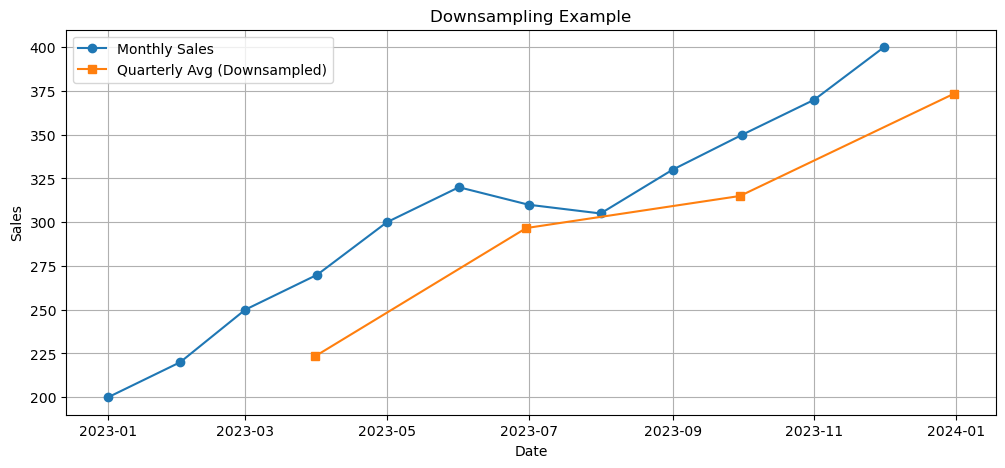

In [8]:
# Plot results
plt.figure(figsize=(12,5))

plt.plot(df_monthly.index, df_monthly["Sales"], marker='o', label="Monthly Sales")

plt.plot(df_quarterly.index, df_quarterly["Sales"], marker='s', label="Quarterly Avg (Downsampled)")
plt.title("Downsampling Example")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()




In [11]:
df_daily.head(10)  # show first 10 daily records (will have NaN)

,Sales
2023-01-01,200.0
2023-01-02,NaN
2023-01-03,NaN
2023-01-04,NaN
2023-01-05,NaN
2023-01-06,NaN
2023-01-07,NaN
2023-01-08,NaN
2023-01-09,NaN
2023-01-10,NaN


### Part 2 — Interpolation

Why

Used after upsampling or when data is missing to estimate unknown values.

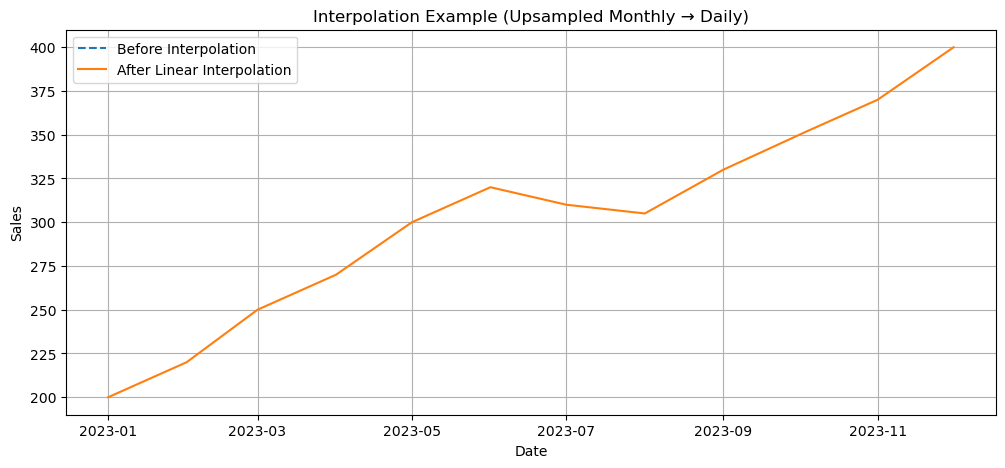

In [6]:
# Fill NaN daily values using linear interpolation

df_daily_interp = df_daily.interpolate(method='linear')


# .interpolate(method='linear') → fills missing values by drawing straight lines between known points.

# Plot before and after interpolation

plt.figure(figsize=(12,5))

plt.plot(df_daily.index, df_daily["Sales"], label="Before Interpolation", linestyle='--')

plt.plot(df_daily_interp.index, df_daily_interp["Sales"], label="After Linear Interpolation")
plt.title("Interpolation Example (Upsampled Monthly → Daily)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()



### Observation

Before interpolation: gaps in the daily data.

After interpolation: smooth transition between monthly values — daily sales are estimated, not actual.



### Part 3 — Transformation

Why

Transformations reduce variance, make data more linear, and help meet model assumptions.

### Common methods

Square root transform: Reduces spread when variance increases moderately.

Log transform: Handles exponential growth.

In [7]:
# Simulate exponential-like growth
sales_exp = [200, 220, 250, 300, 360, 430, 520, 630, 760, 900, 1100, 1350]

df_exp = pd.DataFrame({"Sales": sales_exp}, index=dates)
df_exp

,Sales
2023-01-01,200
2023-02-01,220
2023-03-01,250
2023-04-01,300
2023-05-01,360
2023-06-01,430
2023-07-01,520
2023-08-01,630
2023-09-01,760
2023-10-01,900


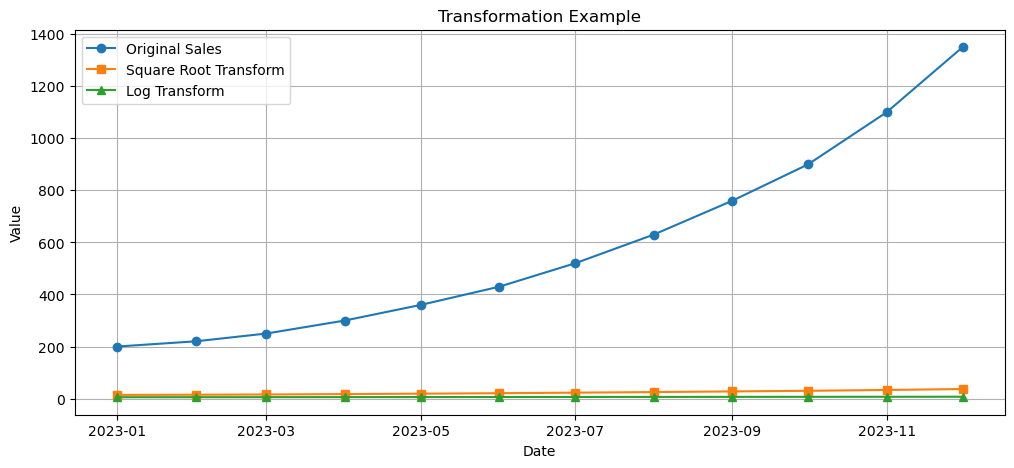

In [14]:

# Apply transformations
df_exp["SquareRoot"] = np.sqrt(df_exp["Sales"])
df_exp["Log"] = np.log(df_exp["Sales"])

# Plot all three
plt.figure(figsize=(12,5))

plt.plot(df_exp.index, df_exp["Sales"], marker='o', label="Original Sales")

plt.plot(df_exp.index, df_exp["SquareRoot"], marker='s', label="Square Root Transform")

plt.plot(df_exp.index, df_exp["Log"], marker='^', label="Log Transform")

plt.title("Transformation Example")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
df_exp['Sales'].head()

2023-01-01    200
2023-02-01    220
2023-03-01    250
2023-04-01    300
2023-05-01    360
Freq: MS, Name: Sales, dtype: int64

In [9]:
df_exp["SquareRoot"].head()

2023-01-01    14.142136
2023-02-01    14.832397
2023-03-01    15.811388
2023-04-01    17.320508
2023-05-01    18.973666
Freq: MS, Name: SquareRoot, dtype: float64

In [11]:
df_exp["Log"].head()

2023-01-01    5.298317
2023-02-01    5.393628
2023-03-01    5.521461
2023-04-01    5.703782
2023-05-01    5.886104
Freq: MS, Name: Log, dtype: float64

### Observation

Original sales grow rapidly over time.

Square root transformation flattens the curve slightly.

Log transformation flattens it even more, making it closer to a straight line — easier for linear models.

### Summary All plot together

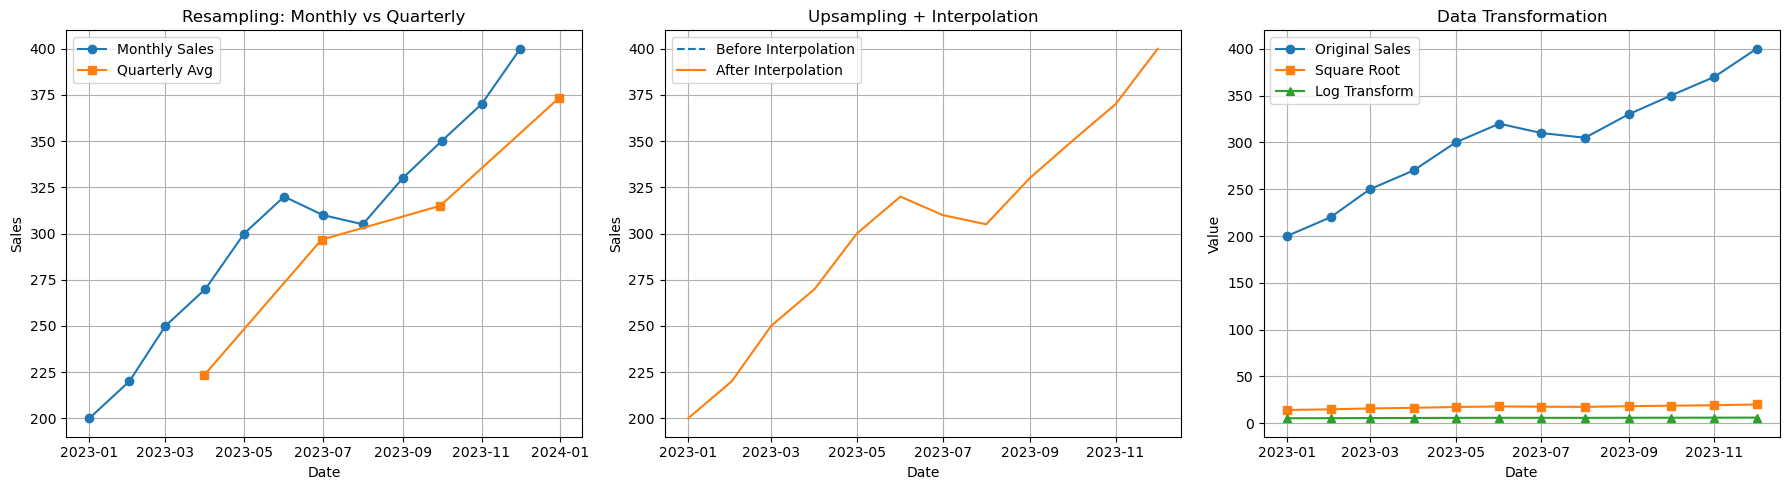

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create monthly sales data
dates = pd.date_range(start="2023-01-01", periods=12, freq='MS')
sales = [200, 220, 250, 270, 300, 320, 310, 305, 330, 350, 370, 400]
df_monthly = pd.DataFrame({"Sales": sales}, index=dates)

# 1️⃣ Resampling - Downsampling to Quarterly
df_quarterly = df_monthly.resample('Q').mean()

# 2️⃣ Upsampling - Monthly → Daily
df_daily = df_monthly.resample('D').mean()

# Interpolation on daily data
df_daily_interp = df_daily.interpolate(method='linear')

# 3️⃣ Transformation on original data
df_monthly["SquareRoot"] = np.sqrt(df_monthly["Sales"])
df_monthly["Log"] = np.log(df_monthly["Sales"])

# --- Create subplot grid ---
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Plot 1: Resampling
axes[0].plot(df_monthly.index, df_monthly["Sales"], marker='o', label="Monthly Sales")
axes[0].plot(df_quarterly.index, df_quarterly["Sales"], marker='s', label="Quarterly Avg")
axes[0].set_title("Resampling: Monthly vs Quarterly")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Sales")
axes[0].legend()
axes[0].grid(True)

# Plot 2: Interpolation
axes[1].plot(df_daily.index, df_daily["Sales"], linestyle='--', label="Before Interpolation")
axes[1].plot(df_daily_interp.index, df_daily_interp["Sales"], label="After Interpolation")
axes[1].set_title("Upsampling + Interpolation")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Sales")
axes[1].legend()
axes[1].grid(True)

# Plot 3: Transformation
axes[2].plot(df_monthly.index, df_monthly["Sales"], marker='o', label="Original Sales")
axes[2].plot(df_monthly.index, df_monthly["SquareRoot"], marker='s', label="Square Root")
axes[2].plot(df_monthly.index, df_monthly["Log"], marker='^', label="Log Transform")
axes[2].set_title("Data Transformation")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Value")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


### Left Plot (Resampling)

The monthly series (blue) is more detailed.

The quarterly average (orange) is smoother because it compresses three months into one value.

Useful when you want to reduce noise or focus on long-term trends.

### Middle Plot (Interpolation)

Dashed line shows gaps after upsampling from monthly to daily.

Solid line shows smooth daily estimates after linear interpolation.

Remember: interpolated values are estimates — not actual recorded data.

### Right Plot (Transformation)

Original sales grow at a faster rate.

Square root transform slightly flattens the curve.

Log transform flattens it even more, making it easier for many forecasting models to handle.